In [23]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [24]:
image_folder = "../data/"

In [25]:
class Config():
  #image default crop size : 218*178
  image_target_size = (64,64)
  batch_size = 64

Create transform and its reverse transformation. We transform the images' RGB values into (-1, 1) range.

In [26]:
transform = transforms.Compose([
    transforms.CenterCrop(500),
    transforms.Resize(Config.image_target_size),
    transforms.ToTensor(), 
    transforms.Lambda(lambda t: (t * 2) - 1),
])

reverse_transform = transforms.Compose([
    transforms.Lambda(lambda t: (t + 1) / 2),
    transforms.Lambda(lambda t: t.permute(1, 2, 0)),
    transforms.Lambda(lambda t: t * 255.),
    transforms.Lambda(lambda t: t.cpu().numpy().astype(np.uint8)),
    transforms.ToPILImage(),
])

Load Flowers102 dataset (split into train, validation and test).

In [27]:
train_dataset = torchvision.datasets.Flowers102(root=image_folder, split='train', download=True, transform=transform)
val_dataset = torchvision.datasets.Flowers102(root=image_folder, split='val', download=True, transform=transform)
test_dataset = torchvision.datasets.Flowers102(root=image_folder, split='test', download=True, transform=transform)

Create dataloader with train dataset to visualize images.

In [28]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=Config.batch_size, num_workers=0)

Plot first 10 images from the first batch in train dataloader.

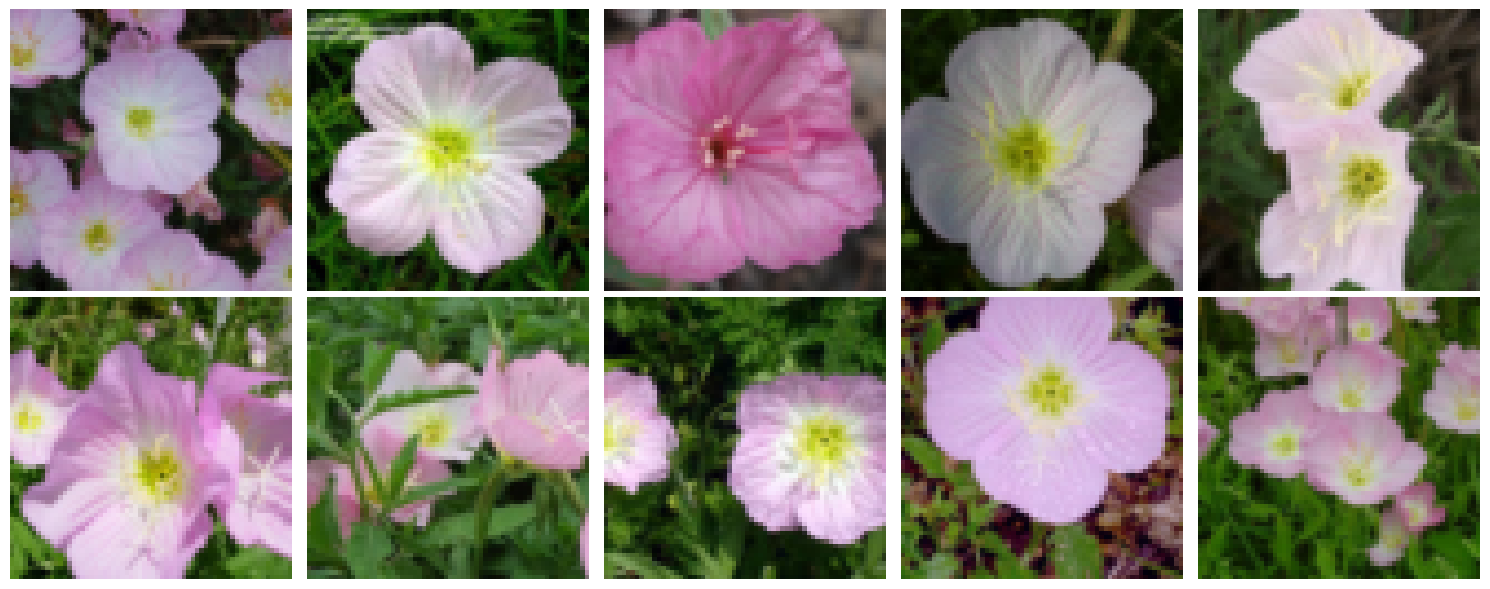

In [29]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
for batch, _ in train_loader:
    for ax, item in zip(axes.flat,  batch[:10]):
        image = reverse_transform(item)
        ax.imshow(image)
        ax.axis('off')
    break
plt.tight_layout()
plt.show()